In [20]:
import os
from typing import List, Optional

def find_result_files(
    directory: str,
    algorithms: Optional[List[str]] = None,
    other: Optional[List[str]] = None,
) -> List[str]:
    """
    查找符合要求的文件名
    
    Args:
        directory: 要搜索的目录路径
        algorithms: 算法名称列表，文件需要包含其中至少一个
        other: 其他需要包含的字符串列表，文件需要包含所有指定的字符串
    
    Returns:
        符合条件的文件名列表
    """
    # 检查目录是否存在且不为空
    if not os.path.exists(directory):
        raise FileNotFoundError(f"Directory '{directory}' does not exist")
    
    if not os.path.isdir(directory):
        raise NotADirectoryError(f"'{directory}' is not a directory")
    
    if not os.listdir(directory):
        return []
    
    # 初始化参数
    algorithms = algorithms or []
    other = other or []
    
    matched_files = []
    
    # 遍历目录中的文件
    for filename in os.listdir(directory):
        # 检查算法条件
        if algorithms:
            algorithm_match = any(alg in filename for alg in algorithms)
            if not algorithm_match:
                continue
        
        # 检查其他条件
        if other:
            other_match = all(item in filename for item in other)
            if not other_match:
                continue
        
        matched_files.append(filename)
    
    return matched_files
files = find_result_files(
    'output/0',
    algorithms=['FedMR', 'FedAvg',],
    other=['cifar10','test_loss']
)
print(files)

['cifar10_FedAvg_resnet20_test_loss_2000_lr_0.01_2025_04_15_19_52_43_frac_0.1_100.txt', 'cifar10_FedMR_resnet20_test_loss_2000_lr_0.01_2025_04_16_00_48_08_frac_0.1_100_pre_50.txt', 'cifar10_FedAvg_resnet20_test_loss_2000_lr_0.01_2025_04_16_10_03_19_frac_0.1_100_pre_50.txt']


In [24]:
import matplotlib.pyplot as plt
from findfile import find_result_files
import glob
file_dir='output/0'
algorithms=['FedAvg','FedMR','FedCodl_revise','FedKDMRV3',]
other=['cifar10','test_acc','pre_50']
files=find_result_files(file_dir,algorithms,other)
print(len(files))
print(files)

4
['output/0/cifar10_FedMR_resnet20_test_acc_2000_lr_0.01_2025_04_16_00_48_08_frac_0.1_100_pre_50.txt', 'output/0/cifar10_FedAvg_resnet20_test_acc_2000_lr_0.01_2025_04_16_10_03_18_frac_0.1_100_pre_50.txt', 'output/0/cifar10_FedCodl_revise_resnet20_test_acc_2000_lr_0.01_2025_04_18_02_07_38_frac_0.1_100_pre_50.txt', 'output/0/cifar10_FedKDMRV3_resnet20_test_acc_2000_lr_0.01_2025_04_22_22_17_34_frac_0.1_100_pre_50.txt']


7


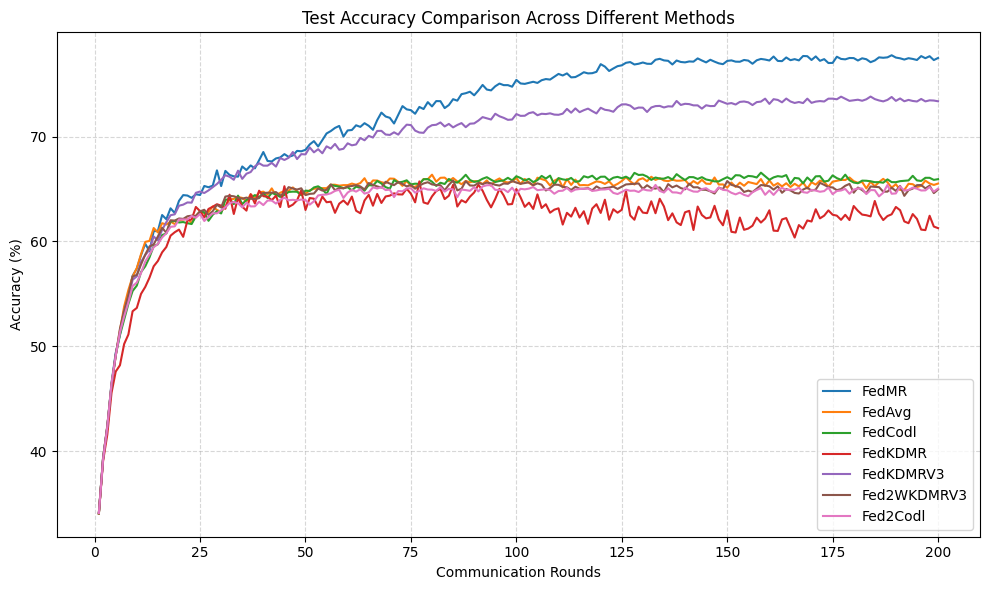

In [26]:
import matplotlib.pyplot as plt
from findfile import find_result_files
import glob
file_dir='output/0'
algorithms=['FedAvg','FedMR','FedCodl_revise','Fed2Codl_revise','FedKDMRV3','Fed2WKDMRV3','FedKDMR_d']
other=['cifar10','test_acc','pre_50']
file_list=find_result_files(file_dir,algorithms,other)
print(len(file_list))


plt.figure(figsize=(10, 6))

# 遍历每个文件并绘制曲线
for file_path in file_list:
    # 读取文件数据
    with open(file_path, 'r') as file:
        data = file.read().strip().split()
    
    # 提取文件名作为图例标签（可自定义）
    label = file_path.split('_')[1]  # 例如提取 'FedAvg' 作为标签
    
    # 转换数据并绘制
    accuracy = [float(x) for x in data[1:]]  # 跳过 'base'
    rounds = range(1, len(accuracy) + 1)
    
    plt.plot(rounds, accuracy, marker='', linestyle='-', linewidth=1.5, label=label)

# 添加图表元素
plt.title('Test Accuracy Comparison Across Different Methods')
plt.xlabel('Communication Rounds')
plt.ylabel('Accuracy (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()  # 显示图例
plt.tight_layout()

# 显示或保存图表
plt.show()

In [235]:
import re
from pathlib import Path

def clean_tensor_file(file_path):
    """完全修正文件内容的可靠版本"""
    file_path = Path(file_path)
    
    # 读取原始内容
    try:
        with open(file_path, 'r') as f:
            content = f.read()
    except Exception as e:
        print(f"读取文件失败: {e}")
        return False

    # 多种匹配模式（覆盖常见情况）
    patterns = [
        r'tensor\((\d+\.\d+)\)',  # tensor(20.3000)
        r'tensor\((\d+)\)',        # tensor(20)
        r'tensor\(([\d\.]+)\)',    # 通用情况
    ]

    # 逐步替换所有匹配项
    for pattern in patterns:
        content = re.sub(pattern, r'\1', content)

    # 写入修正后内容
    try:
        with open(file_path, 'w') as f:
            f.write(content)
        print(f"成功修正文件: {file_path}")
        return True
    except Exception as e:
        print(f"写入文件失败: {e}")
        return False

# 使用示例（替换为你的实际路径）
file_to_fix = "your_data_file.txt"


        
file_dir='output/0'
algorithms=['FedProx'
            ,'FedExP'
           ]
other=['cifar100_','test_acc','pre_50','KD_']
file_list=find_result_files(file_dir,algorithms,other)
print(file_list)
for file_path in file_list:
    print('1')
    if clean_tensor_file(file_path):
        print("修正完成！请检查文件内容")
    else:
        print("修正失败，请检查错误信息")

['output/0/cifar100_FedProx_resnet20_test_acc_2000_lr_0.01_2025_05_02_06_57_12_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt', 'output/0/cifar100_FedExP_resnet20_test_acc_2000_lr_0.01_2025_05_02_10_55_37_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt']
1
成功修正文件: output/0/cifar100_FedProx_resnet20_test_acc_2000_lr_0.01_2025_05_02_06_57_12_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt
修正完成！请检查文件内容
1
成功修正文件: output/0/cifar100_FedExP_resnet20_test_acc_2000_lr_0.01_2025_05_02_10_55_37_frac_0.1_100_pre_50_KD_0.5_T_2.0.txt
修正完成！请检查文件内容


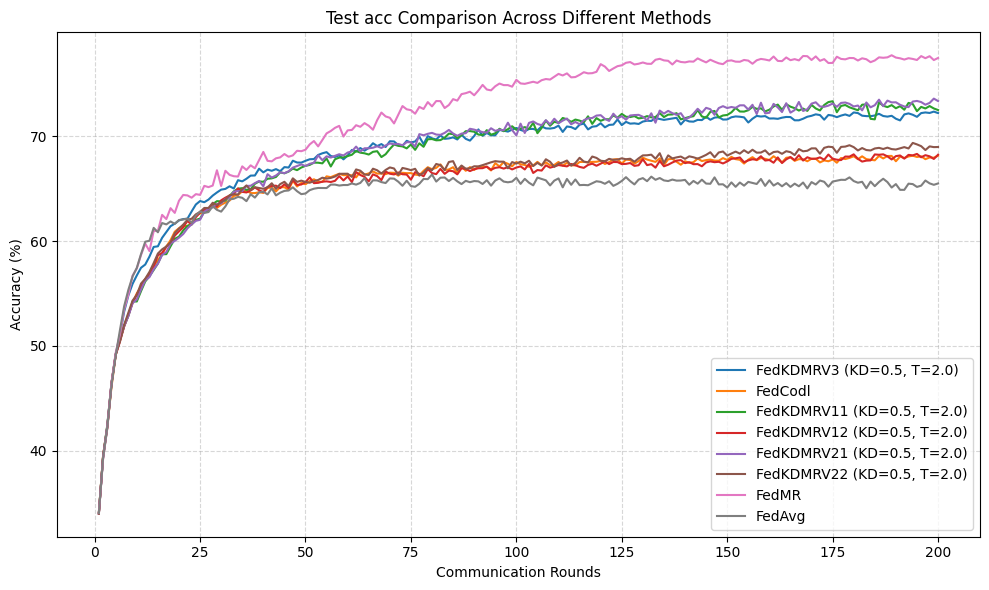

In [57]:
import matplotlib.pyplot as plt
from findfile import find_result_files
import glob
file_dir='output/0'
algorithms1=['FedKDMRV3'
             # ,'FedAvg'
            # ,'FedMR'
            # ,'FedKDMRV3'
            ,'FedKDMRV11'
            ,'FedKDMRV12'
            ,'FedKDMRV21'
            ,'FedKDMRV22'
            ,'FedCodl_'
            ,'FedProx'
            ,'FedExP'
            # ,'FedKDMR_d'
            # ,'Fed2WKDMRV3'
            # ,'Fed2Codl_revise'
           ]
other1=['cifar10_','test_acc','pre_50','KD_0.5']
algorithms2=['FedAvg'
            # ,'FedKDMRV21'
             ,'FedMR'
             # ,'FedKDMRV3'
            
           ]
other2=['cifar10_','test_acc','pre_50']
file_list1=find_result_files(file_dir,algorithms1,other1)
file_list2=find_result_files(file_dir,algorithms2,other2)
file_list=file_list1+file_list2
# file_list=file_list1
plt.figure(figsize=(10, 6))

# 遍历每个文件并绘制曲线
for file_path in file_list:
    # 读取文件数据
    with open(file_path, 'r') as file:
        data = file.read().strip().split()
    
    # 提取文件名作为图例标签（可自定义）
    base_label = file_path.split('_')[1]  # 例如提取 'FedAvg' 作为标签
    label = base_label
    if 'FedKDMR' in file_path and 'KD_' in file_path and 'T_' in file_path:
        try:
            # 找到KD和T参数的位置
            kd_idx = file_path.find('KD_') + 3
            t_idx = file_path.find('T_') + 2
            # 提取参数值（假设格式为KD_x.y_T_z.w）
            kd_value = file_path[kd_idx: file_path.find('_', kd_idx)]
            t_value = file_path[t_idx: file_path.find('.', t_idx) + 2]  # 保留小数点后两位
            label = f"{base_label} (KD={kd_value}, T={t_value})"
        except:
            pass  # 如果提取失败保持原标签
    accuracy = [float(x) for x in data[1:]]  # 跳过 'base'
    rounds = range(1, len(accuracy) + 1)
    
    plt.plot(rounds, accuracy, marker='', linestyle='-', linewidth=1.5, label=label)

# 添加图表元素
plt.title('Test acc Comparison Across Different Methods')
plt.xlabel('Communication Rounds')
plt.ylabel('Accuracy (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()  # 显示图例
plt.tight_layout()

# 显示或保存图表
plt.show()

8


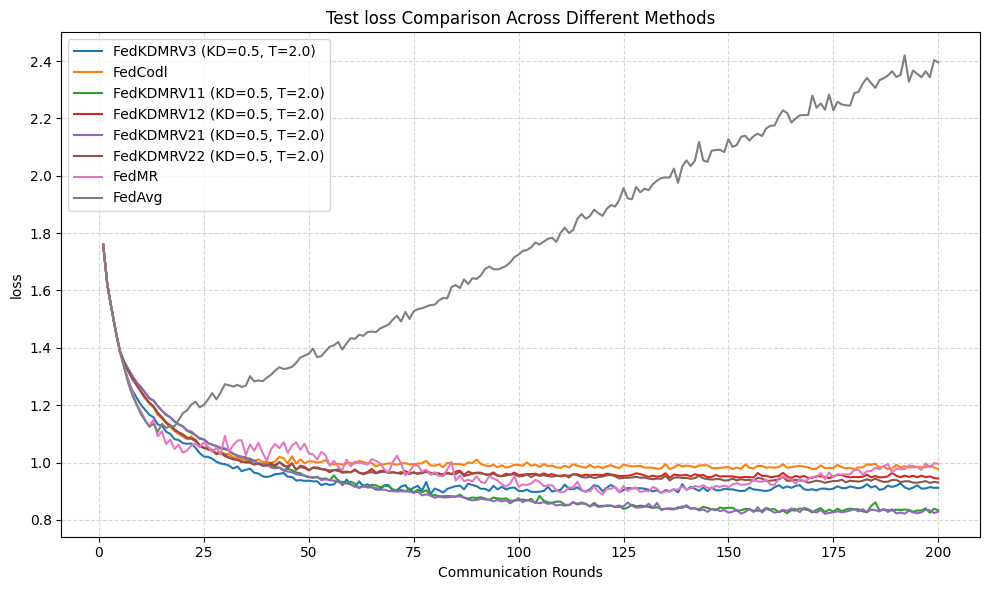

In [55]:
import matplotlib.pyplot as plt
from findfile import find_result_files
import glob
file_dir='output/0'
algorithms1=['FedKDMRV3'
             # ,'FedAvg'
            # ,'FedMR'
            # ,'FedKDMRV3'
            ,'FedKDMRV11'
            ,'FedKDMRV12'
            ,'FedKDMRV21'
            ,'FedKDMRV22'
            ,'FedCodl_'
            ,'FedProx'
            ,'FedExP'
            # ,'FedKDMR_d'
            # ,'Fed2WKDMRV3'
            # ,'Fed2Codl_revise'
           ]
other1=['cifar10_','test_loss','pre_50','KD_0.5']
algorithms2=['FedAvg'
            # ,'FedKDMRV21'
             ,'FedMR'
             # ,'FedKDMRV3'
            
           ]
other2=['cifar10_','test_loss','pre_50']
file_list1=find_result_files(file_dir,algorithms1,other1)
file_list2=find_result_files(file_dir,algorithms2,other2)
file_list=file_list1+file_list2
# file_list=file_list1
print(len(file_list))


plt.figure(figsize=(10, 6))

# 遍历每个文件并绘制曲线
for file_path in file_list:
    # 读取文件数据
    with open(file_path, 'r') as file:
        data = file.read().strip().split()
    
    # 提取文件名作为图例标签（可自定义）
    base_label = file_path.split('_')[1]  # 例如提取 'FedAvg' 作为标签
    label = base_label
    if 'FedKDMR' in file_path and 'KD_' in file_path and 'T_' in file_path:
        try:
            # 找到KD和T参数的位置
            kd_idx = file_path.find('KD_') + 3
            t_idx = file_path.find('T_') + 2
            # 提取参数值（假设格式为KD_x.y_T_z.w）
            kd_value = file_path[kd_idx: file_path.find('_', kd_idx)]
            t_value = file_path[t_idx: file_path.find('.', t_idx) + 2]  # 保留小数点后两位
            label = f"{base_label} (KD={kd_value}, T={t_value})"
        except:
            pass  # 如果提取失败保持原标签
    # 转换数据并绘制
    accuracy = [float(x) for x in data[1:]]  # 跳过 'base'
    rounds = range(1, len(accuracy) + 1)
    
    plt.plot(rounds, accuracy, marker='', linestyle='-', linewidth=1.5, label=label)

# 添加图表元素
plt.title('Test loss Comparison Across Different Methods')
plt.xlabel('Communication Rounds')
plt.ylabel('loss')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()  # 显示图例
plt.tight_layout()

# 显示或保存图表
plt.show()

14


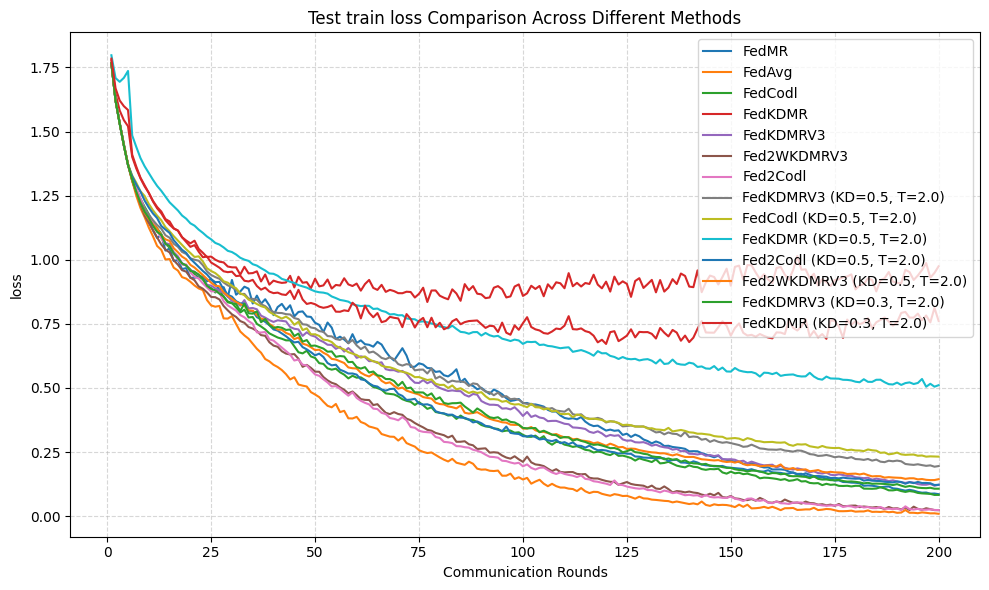

In [215]:
import matplotlib.pyplot as plt
from findfile import find_result_files
import glob
file_dir='output/0'
algorithms=['FedAvg'
            ,'FedMR'
            ,'FedKDMRV3'
            ,'FedCodl_revise'
            ,'FedKDMR_d'
            ,'Fed2WKDMRV3'
            ,'Fed2Codl_revise'
           ]
other=['cifar10_','test_train_loss','pre_50']
file_list=find_result_files(file_dir,algorithms,other)
print(len(file_list))


plt.figure(figsize=(10, 6))

# 遍历每个文件并绘制曲线
for file_path in file_list:
    # 读取文件数据
    with open(file_path, 'r') as file:
        data = file.read().strip().split()
    
    # 提取文件名作为图例标签（可自定义）
    base_label = file_path.split('_')[1]  # 例如提取 'FedAvg' 作为标签
    label = base_label
    if 'KD_' in file_path and 'T_' in file_path:
        try:
            # 找到KD和T参数的位置
            kd_idx = file_path.find('KD_') + 3
            t_idx = file_path.find('T_') + 2
            # 提取参数值（假设格式为KD_x.y_T_z.w）
            kd_value = file_path[kd_idx: file_path.find('_', kd_idx)]
            t_value = file_path[t_idx: file_path.find('.', t_idx) + 2]  # 保留小数点后两位
            label = f"{base_label} (KD={kd_value}, T={t_value})"
        except:
            pass  # 如果提取失败保持原标签
    # 转换数据并绘制
    accuracy = [float(x) for x in data[1:]]  # 跳过 'base'
    rounds = range(1, len(accuracy) + 1)
    
    plt.plot(rounds, accuracy, marker='', linestyle='-', linewidth=1.5, label=label)

# 添加图表元素
plt.title('Test train loss Comparison Across Different Methods')
plt.xlabel('Communication Rounds')
plt.ylabel('loss')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()  # 显示图例
plt.tight_layout()

# 显示或保存图表
plt.show()

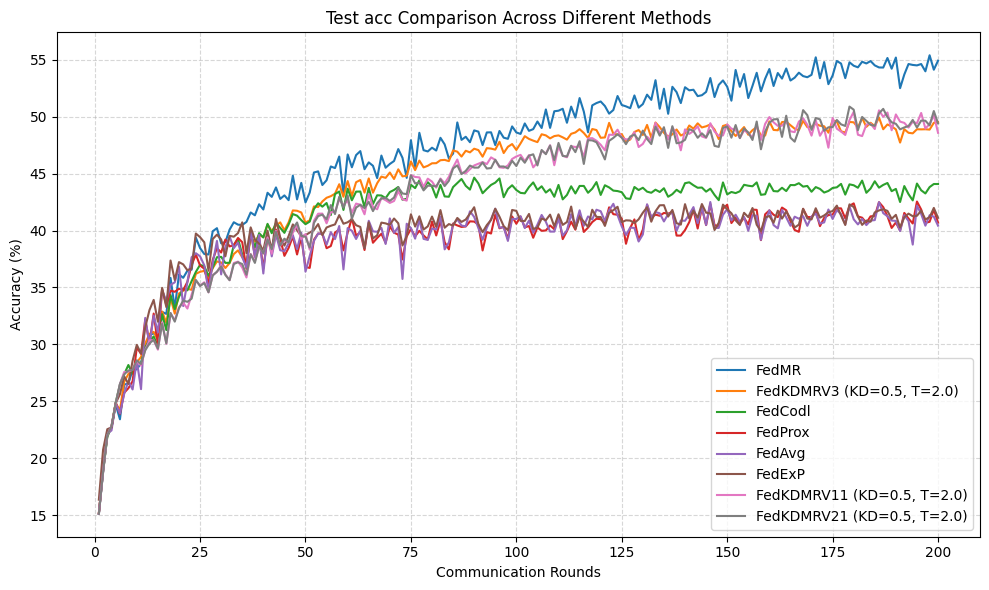

In [4]:
import matplotlib.pyplot as plt
from findfile import find_result_files
import glob
file_dir='output/5/0.5'
algorithms1=['FedKDMRV3'
             ,'FedAvg'
            ,'FedMR_'
            # ,'FedKDMRV3'
            ,'FedKDMRV11'
            # ,'FedKDMRV12'
            ,'FedKDMRV21'
            # ,'FedKDMRV22'
            ,'FedCodl_'
            ,'FedProx'
            ,'FedExP'
            # ,'FedMRwG'
            # ,'FedKDMR_d'
            # ,'Fed2WKDMRV3'
            # ,'Fed2Codl_revise'
           ]
other1=['cifar100_','test_acc','pre_50','KD_']
# algorithms2=['FedAvg'
#             # ,'FedKDMRV21'
#              ,'FedMR'
#              # ,'FedKDMRV3'
            
#            ]
# other2=['cifar100_','test_acc','pre_50']
file_list1=find_result_files(file_dir,algorithms1,other1)
# file_list2=find_result_files(file_dir,algorithms2,other2)
# file_list=file_list1+file_list2
file_list=file_list1
plt.figure(figsize=(10, 6))

# 遍历每个文件并绘制曲线
for file_path in file_list:
    # 读取文件数据
    with open(file_path, 'r') as file:
        data = file.read().strip().split()
    
    # 提取文件名作为图例标签（可自定义）
    base_label = file_path.split('_')[1]  # 例如提取 'FedAvg' 作为标签
    label = base_label
    if 'FedKDMR' in file_path and 'KD_' in file_path and 'T_' in file_path:
        try:
            # 找到KD和T参数的位置
            kd_idx = file_path.find('KD_') + 3
            t_idx = file_path.find('T_') + 2
            # 提取参数值（假设格式为KD_x.y_T_z.w）
            kd_value = file_path[kd_idx: file_path.find('_', kd_idx)]
            t_value = file_path[t_idx: file_path.find('.', t_idx) + 2]  # 保留小数点后两位
            label = f"{base_label} (KD={kd_value}, T={t_value})"
        except:
            pass  # 如果提取失败保持原标签
    accuracy = [float(x) for x in data[1:]]  # 跳过 'base'
    rounds = range(1, len(accuracy) + 1)
    
    plt.plot(rounds, accuracy, marker='', linestyle='-', linewidth=1.5, label=label)

# 添加图表元素
plt.title('Test acc Comparison Across Different Methods')
plt.xlabel('Communication Rounds')
plt.ylabel('Accuracy (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()  # 显示图例
plt.tight_layout()

# 显示或保存图表
plt.show()

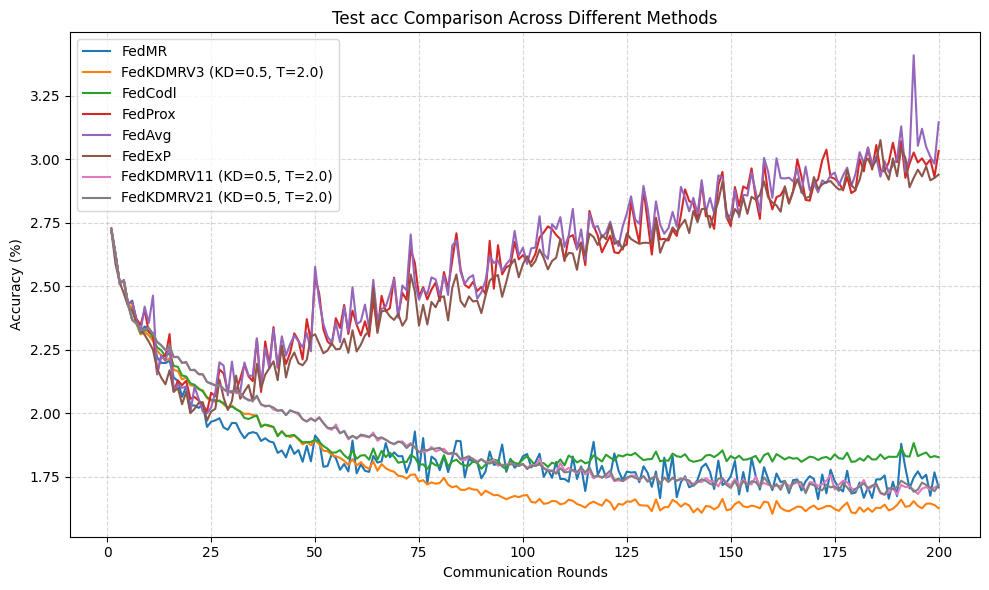

In [6]:
import matplotlib.pyplot as plt
from findfile import find_result_files
import glob
file_dir='output/5/0.5'
algorithms1=['FedKDMRV3'
             ,'FedAvg'
            ,'FedMR_'
            # ,'FedKDMRV3'
            ,'FedKDMRV11'
            # ,'FedKDMRV12'
            ,'FedKDMRV21'
            # ,'FedKDMRV22'
            ,'FedCodl_'
            ,'FedProx'
            ,'FedExP'
            # ,'FedMRwG'
            # ,'FedKDMR_d'
            # ,'Fed2WKDMRV3'
            # ,'Fed2Codl_revise'
           ]
other1=['cifar100_','test_loss','pre_50','KD_']
# algorithms2=['FedAvg'
#             # ,'FedKDMRV21'
#              ,'FedMR'
#              # ,'FedKDMRV3'
            
#            ]
# other2=['cifar100_','test_acc','pre_50']
file_list1=find_result_files(file_dir,algorithms1,other1)
# file_list2=find_result_files(file_dir,algorithms2,other2)
# file_list=file_list1+file_list2
file_list=file_list1
plt.figure(figsize=(10, 6))

# 遍历每个文件并绘制曲线
for file_path in file_list:
    # 读取文件数据
    with open(file_path, 'r') as file:
        data = file.read().strip().split()
    
    # 提取文件名作为图例标签（可自定义）
    base_label = file_path.split('_')[1]  # 例如提取 'FedAvg' 作为标签
    label = base_label
    if 'FedKDMR' in file_path and 'KD_' in file_path and 'T_' in file_path:
        try:
            # 找到KD和T参数的位置
            kd_idx = file_path.find('KD_') + 3
            t_idx = file_path.find('T_') + 2
            # 提取参数值（假设格式为KD_x.y_T_z.w）
            kd_value = file_path[kd_idx: file_path.find('_', kd_idx)]
            t_value = file_path[t_idx: file_path.find('.', t_idx) + 2]  # 保留小数点后两位
            label = f"{base_label} (KD={kd_value}, T={t_value})"
        except:
            pass  # 如果提取失败保持原标签
    accuracy = [float(x) for x in data[1:]]  # 跳过 'base'
    rounds = range(1, len(accuracy) + 1)
    
    plt.plot(rounds, accuracy, marker='', linestyle='-', linewidth=1.5, label=label)

# 添加图表元素
plt.title('Test acc Comparison Across Different Methods')
plt.xlabel('Communication Rounds')
plt.ylabel('Accuracy (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()  # 显示图例
plt.tight_layout()

# 显示或保存图表
plt.show()

7


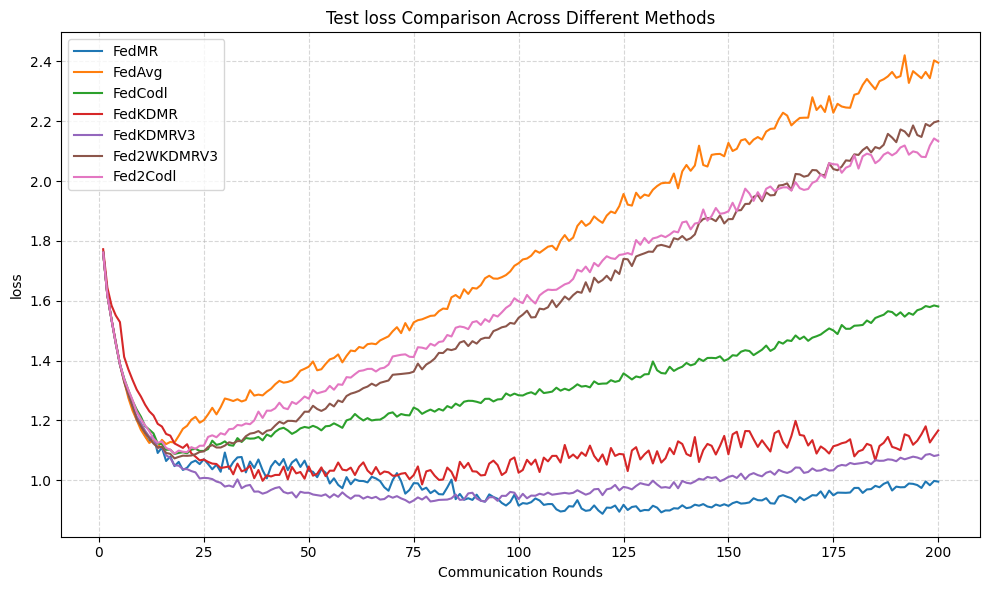

In [33]:
import matplotlib.pyplot as plt
from findfile import find_result_files
import glob
file_dir='output/0'
algorithms=['FedAvg','FedMR','FedCodl_revise','Fed2Codl_revise','FedKDMRV3','Fed2WKDMRV3','FedKDMR_d']
other=['cifar10','test_loss','pre_50']
file_list=find_result_files(file_dir,algorithms,other)
print(len(file_list))


plt.figure(figsize=(10, 6))

# 遍历每个文件并绘制曲线
for file_path in file_list:
    # 读取文件数据
    with open(file_path, 'r') as file:
        data = file.read().strip().split()
    
    # 提取文件名作为图例标签（可自定义）
    label = file_path.split('_')[1]  # 例如提取 'FedAvg' 作为标签
    
    # 转换数据并绘制
    accuracy = [float(x) for x in data[1:]]  # 跳过 'base'
    rounds = range(1, len(accuracy) + 1)
    
    plt.plot(rounds, accuracy, marker='', linestyle='-', linewidth=1.5, label=label)

# 添加图表元素
plt.title('Test loss Comparison Across Different Methods')
plt.xlabel('Communication Rounds')
plt.ylabel('loss')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()  # 显示图例
plt.tight_layout()

# 显示或保存图表
plt.show()

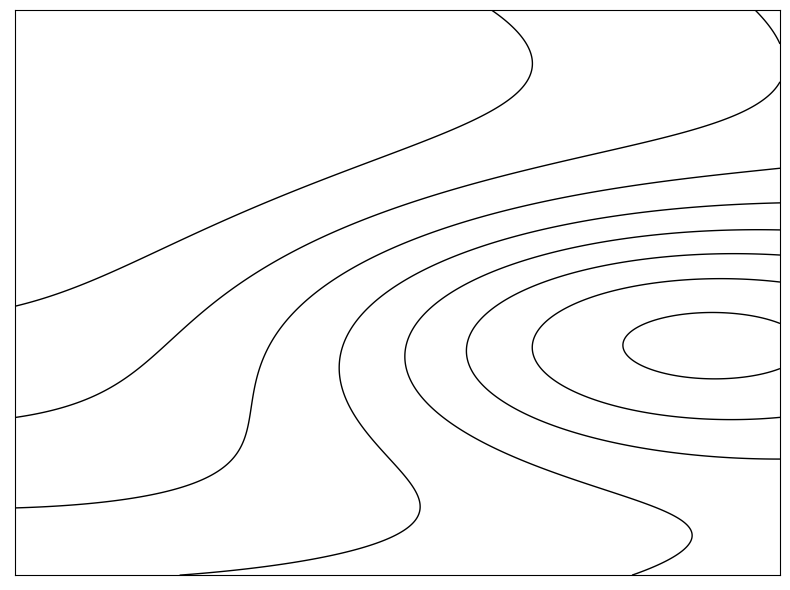

In [187]:
import numpy as np
import matplotlib.pyplot as plt



x = np.linspace(-0,1.75, 500)
y = np.linspace(-2.5, 1, 500)
X, Y = np.meshgrid(x, y)

# 定义损失地形
def loss(x, y):
    """非负损失地形，含陡峭峡谷和平坦区域"""
    # 平坦区域（全局最小）
    flat_region = 0.5 * np.exp(-(x**2 + (y-1)**2)/8)
    
    # 陡峭峡谷（局部最优）
    steep_valley = 1.5 * np.exp(-((x-1.5)**2 + (y+1)**2)*1.5)
    
    # 背景势能（确保非负）
    background = 0.1 * (x**2 + y**2)
    
    # 组合并平移确保最小值为0
    combined = background + steep_valley - flat_region
    return combined - combined.min()  # 平移至非负

Z = loss(X, Y)

# 绘制等高线图
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=8, colors='k', linewidths=1)  # 移除clabel调用
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.grid(False)
plt.tight_layout()
plt.show()